In [1]:
import warnings
warnings.filterwarnings("ignore", module="matplotlib")

import numpy as np
import pandas as pd
from IPython.display import display

import ezhc as hc

<IPython.core.display.Javascript object>

Open console to check js libs were loaded in page


In [2]:
%version_information pandas, requests, jinja2, ipython, ezhc 

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.1.0
OS Darwin 14.5.0 x86_64 i386 64bit
pandas 0.18.1
requests 2.11.1
jinja2 2.8
ipython 5.1.0
ezhc 0.5.15
Wed Sep 14 22:27:51 2016 CEST

## Examples
+ reproduced from http://www.highcharts.com/demo/ and http://www.highcharts.com/stock/demo
+ For each `plot()` call passing `save=True` and optionally `save_name` will save the graph as a stand alone HTML doc under ./saved

## Times series

In [3]:
df = hc.sample.df_timeseries(N=3, Nb_bd=2000)
df['Cash'] = 1.0+0.02/260
df['Cash'] = df['Cash'].cumprod()
display(df.head())
display(df.tail())

,Track1,Track2,Track3,Cash
2015-01-01,1.000000,1.000000,1.000000,1.000077
2015-01-02,0.995581,1.005348,0.966949,1.000154
2015-01-05,0.972516,1.010849,0.989969,1.000231
2015-01-06,0.955501,1.029556,0.982879,1.000308
2015-01-07,0.973585,1.016824,0.973665,1.000385


,Track1,Track2,Track3,Cash
2022-08-25,0.529755,1.523684,0.824704,1.165946
2022-08-26,0.539018,1.538276,0.820019,1.166035
2022-08-29,0.540658,1.536633,0.812321,1.166125
2022-08-30,0.555569,1.532476,0.818423,1.166215
2022-08-31,0.546018,1.506516,0.828384,1.166305


In [4]:
g = hc.Highstock()

g.chart.height = 550
g.legend.enabled = True
g.legend.layout = 'horizontal'
g.legend.align = 'center'
g.legend.maxHeight = 100
g.tooltip.enabled = True
g.tooltip.valueDecimals = 2
g.exporting.enabled = True

g.chart.zoomType = 'xy'
g.title.text = 'Time series plotted with HighStock'
g.subtitle.text = 'Transparent access to the underlying js lib'

g.plotOptions.series.compare = 'percent'
g.yAxis.labels.formatter = hc.scripts.FORMATTER_PERCENT
g.tooltip.pointFormat = hc.scripts.TOOLTIP_POINT_FORMAT_PERCENT
g.tooltip.positioner = hc.scripts.TOOLTIP_POSITIONER_CENTER_TOP

g.xAxis.gridLineWidth = 1.0
g.xAxis.gridLineDashStyle = 'Dot'
g.yAxis.gridLineWidth = 1.0
g.yAxis.gridLineDashStyle = 'Dot'

g.credits.enabled = True
g.credits.text = 'Source: XXX Flow Strategy & Solutions.'
g.credits.href = 'http://www.example.com'


g.series = hc.build.series(df)


g.plot(save=True, save_name='NoTable')

### Exception
+ The function2 `plot_with_table1()` and `plot_with_table2()` are exceptions with respect to the idea of this module: It is NOT just transparent access to Highchart/Highstock. I added a table (based on datatable.net) to display more data about the period selected. This measurements cannot be calculated beforehand, so it has to be postprocessing.  
+ If `save=True` function `plot_with_table1/2()` will create a standalone HTML file containing the output in subdirectory 'saved'. Optionally `save_name` can be set - an automatic time tag is added to keep things orderly, unless `dated=False`.  
+ **NOTE**: Because of css collision between notebook and datatable, the table in the saved file is better looking than in the notebook output area.


In [5]:
g.plot_with_table_1(dated=False, save=True, save_name='Table1')

### Footer
+ A footer can be added to the plot. This is interesting if the plot is saved as a stand alone file.
+ The footer is HTML you can write from scratch but a helper function and a jinja template make it easy.
+ Images are embeded upon save so the saved file is standalone. Only an internet connection is required to download the js libraries.


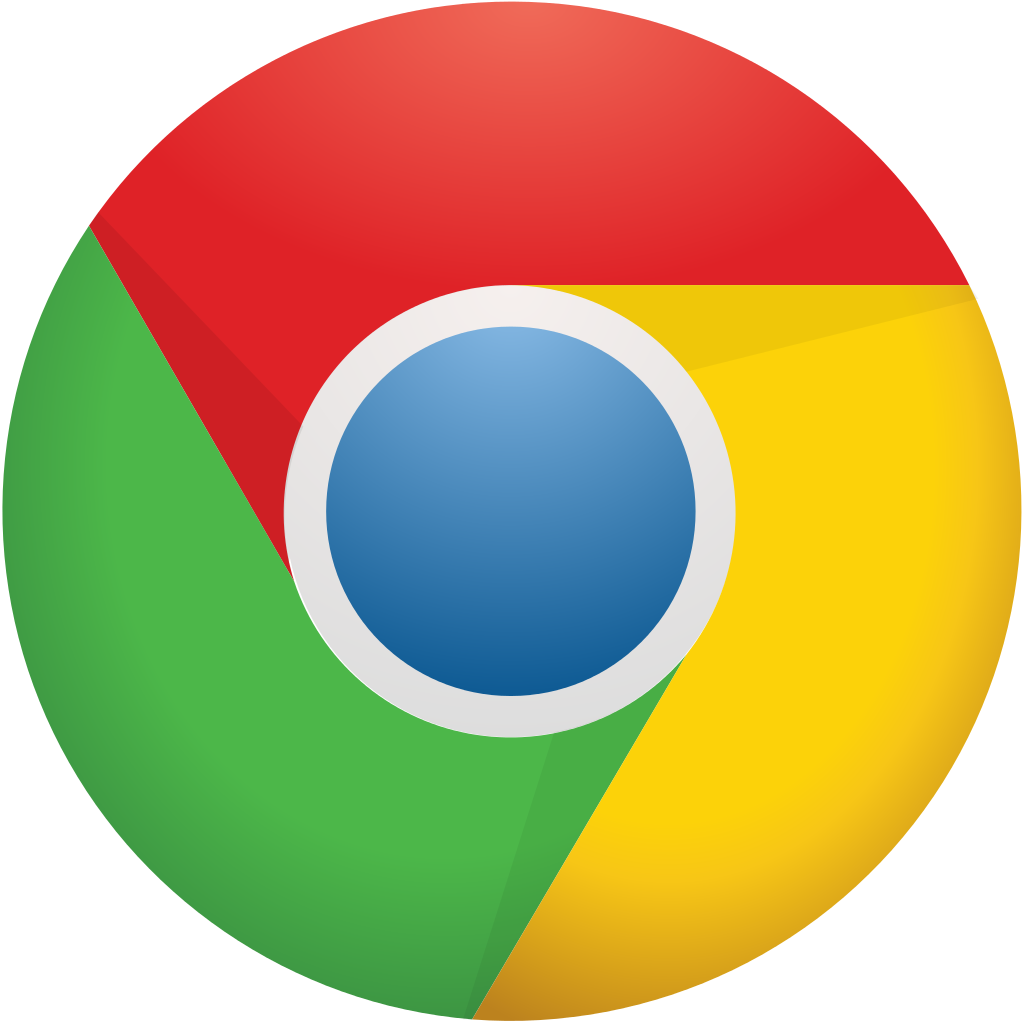

In [6]:
g.plotOptions.series.compare = 'value'
g.yAxis.labels.formatter = hc.scripts.FORMATTER_BASIC
g.tooltip.pointFormat = hc.scripts.TOOLTIP_POINT_FORMAT_BASIC
g.tooltip.formatter = hc.scripts.FORMATTER_QUANTILE

disclaimer = """
THE VALUE OF YOUR INVESTMENT MAY FLUCTUATE. 
THE FIGURES RELATING TO SIMULATED PAST PERFORMANCES REFER TO PAST 
PERIODS AND ARE NOT A RELIABLE INDICATOR OF FUTURE RESULTS. 
THIS ALSO APPLIES TO HISTORICAL MARKET DATA.
"""
template_footer = hc.scripts.TEMPLATE_DISCLAIMER
create_footer = hc.scripts.from_template

# logo_path = hc.scripts.PATH_TO_LOGO_JUPYTER
# logo_path = 'http://img.talkandroid.com/uploads/2015/11/Chrome-Logo.png'
logo_path = hc.scripts.image_src('http://img.talkandroid.com/uploads/2015/11/Chrome-Logo.png')

footer = create_footer(template_footer, comment=disclaimer, img_logo=logo_path)

g.plot_with_table_2(dated=False, save=True, save_name='Table2', footer=footer)

## Column, Bar

In [7]:
df = hc.sample.df_one_idx_several_col()
df

,Jane,Joe,John
Fruit,,,
Apples,2,3,5
Oranges,2,4,3
Pears,3,4,4
Grapes,2,2,7
Bananas,1,5,2


In [8]:
g = hc.Highcharts()

g.chart.type = 'column'
g.chart.width = 500
g.chart.height = 300
# g.plotOptions.column.animation = False

g.title.text = 'Basic Bar Chart'
g.yAxis.title.text = 'Fruit Consumption'

g.xAxis.categories = list(df.index)
g.series = hc.build.series(df)

g.plot()

In [9]:
g.plotOptions.column.stacking = 'normal'
g.title.text = 'Stack Bar Chart'
g.yAxis.title.text = 'Total Fruit Consumption'

g.plot()

In [10]:
g.plotOptions.column.stacking = 'percent'
g.yAxis.title.text = 'Fruit Consumption Distribution'

g.plot()

In [11]:
g = hc.Highcharts()

g.chart.type = 'bar'
g.chart.width = 500
g.chart.height = 400

g.title.text = 'Basic Bar Chart'
g.xAxis.title.text = 'Fruit Consumption'

g.xAxis.categories = list(df.index)
g.series = hc.build.series(df)

g.plot()

In [12]:
g.plotOptions.bar.stacking = 'normal'

g.title.text = 'Stacked Bar Chart'
g.xAxis.title.text = 'Total Fruit Consumption'

g.plot()

In [13]:
g.plotOptions.bar.stacking = 'percent'

g.title.text = 'Stacked Bar Chart'
g.xAxis.title.text = 'Fruit Consumption Distribution'

g.plot()

## Pie

In [14]:
df = hc.sample.df_one_idx_one_col()
df

,MktShare
Brand,
Firefox,45.0
IE,26.8
Chrome,12.8
Safari,8.5
Opera,6.2
Others,0.7


In [15]:
g = hc.Highcharts()

g.chart.type = 'pie'
g.chart.width = 400
g.chart.height = 400
gpo = g.plotOptions.pie
gpo.showInLegend = True
gpo.dataLabels.enabled = False

g.title.text = 'Browser Market Share'

g.series = hc.build.series(df)

g.plot()

In [16]:
g.chart.width = 400
g.chart.height = 300

gpo.showInLegend = False
gpo.dataLabels.enabled = True

gpo.startAngle = -90
gpo.endAngle = 90
gpo.innerSize = '40%'
gpo.center = ['50%', '95%']

g.plot()

## Pie, Column Drilldown

In [17]:
df = hc.sample.df_two_idx_one_col()

df.head()

Market Share
Brand             Version              
Internet Explorer 6.0              6.40
                  7.0              3.55
                  8.0             26.70
                  9.0             16.96
Firefox           2.0              0.09

In [18]:
g = hc.Highcharts()

g.chart.type = 'pie'
g.chart.width = 500
g.chart.height = 500
gpo = g.plotOptions.pie
gpo.showInLegend = False
gpo.dataLabels.enabled = True
gpo.center = ['50%', '50%']
gpo.size = '65%'
g.drilldown.drillUpButton.position = {'x': 0, 'y': 0}

g.title.text = 'Browser Market Share'

g.series, g.drilldown.series = hc.build.series_drilldown(df)

g.plot()

## Column Range

In [19]:
df = hc.sample.df_one_idx_two_col()

df.head()

,Min,Max
Month,,
Jan,-9.7,9.4
Feb,-8.7,6.5
Mar,-3.5,9.4
Apr,-1.4,19.9
May,0.0,22.6


In [20]:
g = hc.Highcharts()
g.chart.type = 'columnrange'
g.chart.inverted = True
g.chart.width = 700
g.chart.height = 400
gpo = g.plotOptions.columnrange
gpo.dataLabels.enabled = True
gpo.dataLabels.formatter = 'function() { return this.y + "°C"; }'
g.tooltip.valueSuffix = '°C'
g.xAxis.categories, g.series = hc.build.series_range(df)
g.series[0]['name'] = 'Temperature'
g.yAxis.title.text = 'Temperature (°C)'
g.xAxis.title.text = 'Month'
g.title.text = 'Temperature Variations by Month'
g.subtitle.text = 'Vik, Norway'

g.legend.enabled = False

g.plot()

## Scatter

In [21]:
df = hc.sample.df_scatter()

df.head()

,,Sex
Height,Weight,
161.2,51.6,Female
167.5,59.0,Female
159.5,49.2,Female
157.0,63.0,Female
155.8,53.6,Female


In [22]:
g = hc.Highcharts()
g.chart.type = 'scatter'
g.chart.width = 700
g.chart.height = 500
g.chart.zoomType = 'xy'

g.plotOptions.scatter.marker.radius = 5

g.tooltip.headerFormat = '<b>{series.name}</b><br>'
g.tooltip.pointFormat = '{point.x} cm, {point.y} kg'

g.legend.layout = 'vertical'
g.legend.align = 'left'
g.legend.verticalAlign = 'top'
g.legend.x = 100
g.legend.y = 70
g.legend.floating = True
g.legend.borderWidth = 1
                
g.xAxis.title.text = 'Height (cm)'
g.yAxis.title.text = 'Weight (kg)'
g.title.text = 'Height Versus Weight of 507 Individuals by Gender'
g.subtitle.text = 'Source: Heinz 2003'
                
g.series = hc.build.series_scatter(df, color={'Female': 'rgba(223, 83, 83, .5)', 'Male': 'rgba(119, 152, 191, .5)'})

g.plot()

## Bubble

In [23]:
df = hc.sample.df_bubble()

df.head()

Size
Cat  x  y       
Cat1 97 36    79
     94 74    60
     68 76    58
     64 87    56
     68 27    73

In [24]:
g = hc.Highcharts()
g.chart.type = 'bubble'
g.chart.width = 700
g.chart.height = 500
g.chart.zoomType = 'xy'
g.plotOptions.bubble.minSize = 20
g.plotOptions.bubble.maxSize = 60
g.legend.enabled = True
g.title.text = 'Bubbles'

g.series = hc.build.series_bubble(df, color={'A': 'rgba(223, 83, 83, .5)', 'B': 'rgba(119, 152, 191, .5)'})

g.plot()

## Treemap
+ Building the points datastructure cannot be wrapped without losing flexibility
+ Example (data and points datastructure taken from http://jsfiddle.net/gh/get/jquery/1.9.1/highslide-software/highcharts.com/tree/master/samples/highcharts/demo/treemap-large-dataset/


In [25]:
df = hc.sample.df_several_idx_one_col()

df.head()

Value
Region Country Cause                          
Africa Algeria Communicable diseases      97.8
               Injuries                   53.8
               Noncommunicable diseases  710.4
       Angola  Communicable diseases     873.3
               Injuries                  137.8

In [26]:
colors = ['#7cb5ec', '#434348', '#90ed7d', '#f7a35c', '#8085e9',
          '#f15c80', '#e4d354', '#2b908f', '#f45b5b', '#91e8e1']

df = hc.sample.df_several_idx_one_col()
idx = df.index
col = df.columns
assert(isinstance(idx, pd.core.index.MultiIndex))
assert(len(col)==1)


lev = idx.names
points = []

region_i = 0
for r in idx.levels[0]:
    region_val = 0
    region_p = {
        'id': 'id_' + str(region_i),
        'name': r,
        'color': colors[region_i]
    }
    country_i = 0
    df_reg = df.xs(r).reset_index().set_index([lev[1], lev[2]])
    for co in df_reg.index.levels[0]:
        country_p = {
            'id': region_p['id'] + "_" + str(country_i),
            'name': co,
            'parent': region_p['id'],
        };
        points.append(country_p)
        cause_i = 0
        df_cou = df_reg.xs(co).reset_index().set_index(lev[2])
        for ca in df_cou.index:
            cause_p = {
                'id': country_p['id'] + "_" + str(cause_i),
                'name': ca,
                'parent': country_p['id'],
                'value': round(df_cou.loc[ca][0]),
            }
            region_val += cause_p['value']
            points.append(cause_p)
            cause_i += 1
        country_i += 1
    region_p['value'] = round(region_val/float(country_i))
    points.append(region_p)
    region_i += 1

points [:5]

[{'id': 'id_0_0', 'name': 'Algeria', 'parent': 'id_0'},
 {'id': 'id_0_0_0',
  'name': 'Communicable diseases',
  'parent': 'id_0_0',
  'value': 98.0},
 {'id': 'id_0_0_1', 'name': 'Injuries', 'parent': 'id_0_0', 'value': 54.0},
 {'id': 'id_0_0_2',
  'name': 'Noncommunicable diseases',
  'parent': 'id_0_0',
  'value': 710.0},
 {'id': 'id_0_1', 'name': 'Angola', 'parent': 'id_0'}]

In [27]:
g = hc.Highcharts()

g.chart.type = 'treemap'
g.chart.width = 900
g.chart.height = 600

g.title.text = 'Global Mortality Rate 2012, per 100 000 population'
g.subtitle.text = 'Click points to drill down.\nSource: \
                  <a href="http://apps.who.int/gho/data/node.main.12?lang=en">WHO</a>.'

g.series = [{
    'type': "treemap",
    'layoutAlgorithm': 'squarified',
    'allowDrillToNode': True,
    'dataLabels': {
        'enabled': False
    },
    'levelIsConstant': False,
    'levels': [{
        'level': 1,
        'dataLabels': {
            'enabled': True
        },
        'borderWidth': 3
    }],
    'data': points,
}]

g.plot()

## Polar Chart

In [28]:
df = pd.DataFrame(data=np.array([[8, 7, 6, 5, 4, 3, 2, 1],
                                 [1, 2, 3, 4, 5, 6, 7, 8],
                                 [1, 8, 2, 7, 3, 6, 4, 5]]).T,
                  columns=['column', 'line', 'area'])

df

,column,line,area
0,8,1,1
1,7,2,8
2,6,3,2
3,5,4,7
4,4,5,3
5,3,6,6
6,2,7,4
7,1,8,5


In [29]:
g = hc.Highcharts()

g.chart.polar = True
g.chart.width = 500
g.chart.height = 500

g.title.text = 'Polar Chart'
g.pane.startAngle = 0
g.pane.endAngle = 360
g.pane.background = [{'backgroundColor': '#FFF',
                      'borderWidth': 0
                     }]


g.xAxis.tickInterval = 45
g.xAxis.min = 0
g.xAxis.max = 360
g.xAxis.labels.formatter = 'function() { return this.value + "°"; }'
g.yAxis.min = 0

g.plotOptions.series.pointStart = 0
g.plotOptions.series.pointInterval = 45
g.plotOptions.column.pointPadding = 0
g.plotOptions.column.groupPadding = 0

g.series = [{
    'type': 'column',
    'name': 'Column',
    'data': list(df['column']),
    'pointPlacement': 'between',
    }, {
    'type': 'line',
    'name': 'Line',
    'data': list(df['line']),
    }, {
    'type': 'area',
    'name': 'Area',
    'data': list(df['area']),
    }
]

g.plot()

## Spider Web

In [30]:
df = pd.DataFrame(data=np.array([[43000, 19000, 60000, 35000, 17000, 10000],
                                 [50000, 39000, 42000, 31000, 26000, 14000]]).T,
                  columns=['Allocated Budget', 'Actual Spending'],
                  index = ['Sales', 'Marketing', 'Development', 'Customer Support',
                           'Information Technology', 'Administration'])

df

,Allocated Budget,Actual Spending
Sales,43000,50000
Marketing,19000,39000
Development,60000,42000
Customer Support,35000,31000
Information Technology,17000,26000
Administration,10000,14000


In [31]:
g = hc.Highcharts()

g.chart.polar = True
g.chart.width = 650
g.chart.height = 500

g.title.text = 'Budget vs. Spending'
g.title.x = -80

g.pane.size = '80%'
g.pane.background = [{'backgroundColor': '#FFF',
                      'borderWidth': 0
                     }]

g.xAxis.tickmarkPlacement = 'on'
g.xAxis.lineWidth = 0
g.xAxis.categories = list(df.index)

g.yAxis.min = 0
g.yAxis.lineWidth = 0
g.yAxis.gridLineInterpolation = 'polygon'

g.tooltip.pointFormat = '<span style="color:{series.color}">{series.name}: <b>${point.y:,.0f}</b><br/>'
g.tooltip.shared = True


g.legend.align = 'right'
g.legend.verticalAlign = 'top'
g.legend.y = 70
g.legend.layout = 'vertical'

g.series = [{
    'name': 'Allocated Budget',
    'data': list(df['Allocated Budget']),
    'pointPlacement': 'on'
    }, {
    'name': 'Actual Spending',
    'data': list(df['Actual Spending']),
    'pointPlacement': 'on'
    },
]

g.plot()

## Box Plot

In [32]:
df_obs = pd.DataFrame(data=np.array([[760, 801, 848, 895, 965],
                                     [733, 853, 939, 980, 1080],
                                     [714, 762, 817, 870, 918],
                                     [724, 802, 806, 871, 950],
                                     [834, 836, 864, 882, 910]]),
                      index=list('ABCDE'))

display(df_obs)

# x, y positions where 0 is the first category
df_outlier = pd.DataFrame(data=np.array([[0, 644],
                                         [4, 718],
                                         [4, 951],
                                         [4, 969]]))


display(df_outlier)

colors = ['#7cb5ec', '#434348', '#90ed7d', '#f7a35c', '#8085e9',
          '#f15c80', '#e4d354', '#2b908f', '#f45b5b', '#91e8e1']

,0,1,2,3,4
A,760,801,848,895,965
B,733,853,939,980,1080
C,714,762,817,870,918
D,724,802,806,871,950
E,834,836,864,882,910


,0,1
0,0,644
1,4,718
2,4,951
3,4,969


In [33]:
g = hc.Highcharts()

g.chart.type = 'boxplot'
g.chart.width = 850
g.chart.height = 500

g.title.text = 'Box Plot Example'

g.legend.enabled = False

g.xAxis.categories = list(df_obs.index)
g.xAxis.title.text = 'Experiment'

g.yAxis.title.text = 'Observations'
g.yAxis.plotLines= [{
    'value': 932,
    'color': 'red',
    'width': 1,
    'label': {
        'text': 'Theoretical mean: 932',
        'align': 'center',
        'style': { 'color': 'gray' }
    }
}]

g.series = []
g.series.append({
    'name': 'Observations',
    'data': list(df_obs.values),
    'tooltip': { 'headerFormat': '<em>Experiment No {point.key}</em><br/>' },
})
g.series.append({
    'name': 'Outlier',
    'color': colors[0],
    'type': 'scatter',
    'data': list(df_outlier.values),
    'marker': {
        'fillColor': 'white',
        'lineWidth': 1,
        'lineColor': colors[0],
    },
    'tooltip': { 'pointFormat': 'Observation: {point.y}' }
})

g.plot()

## Heatmap

In [34]:
df = hc.sample.df_one_idx_several_col_2()

df

,Alexander,Marie,Maximilian,Sophia,Lukas,Maria,Leon,Anna,Tim,Laura
WeekDay,,,,,,,,,,
Monday,10,92,35,72,38,88,13,31,85,47
Tuesday,19,58,15,132,5,32,44,1,97,114
Wednesday,8,78,123,114,8,12,88,82,123,31
Thursday,24,117,64,19,117,6,98,32,64,48
Friday,67,48,52,16,115,120,96,30,84,91


In [35]:
colors = ['#7cb5ec', '#434348', '#90ed7d', '#f7a35c', '#8085e9',
          '#f15c80', '#e4d354', '#2b908f', '#f45b5b', '#91e8e1']
idx, col, data = hc.build.series_heatmap(df)

g = hc.Highcharts()

g.chart.type = 'heatmap'
g.chart.width = 650
g.chart.height = 450

g.title.text = 'Sales per employee per weekday'

g.xAxis.categories = idx
g.yAxis.categories = col
g.yAxis.title = ''


g.colorAxis = {
    'min': 0,
    'minColor': '#FFFFFF',
    'maxColor': colors[0],
}

g.legend = {
    'align': 'right',
    'layout': 'vertical',
    'margin': 0,
    'verticalAlign': 'top',
    'y': 25,
    'symbolHeight': 280 
}

g.tooltip = {
    'formatter': """function () {
    return '<b>' + this.series.xAxis.categories[this.point.x] + '</b> sold <br><b>' +
        this.point.value + '</b> items on <br><b>' + this.series.yAxis.categories[this.point.y] + '</b>';
    }"""
}

g.series = []
g.series.append({
    'name': 'Sales per Employee',
    'borderWidth': 1,
    'data': data,
    'dataLabels': {
            'enabled': True,
            'color': '#000000',
    }
})

g.plot()


## Clock
+ Ok, Maybe not the most useful thing - but an excercise..

In [36]:
hc.Clock()

# Direct access to Highcharts/Highstock documentation
+ Navigate the object property tree
+ An `info()` method gives the official help
+ WARNING: Once a property is set, the info method is not accessible any more

In [37]:
g = hc.Highcharts()

In [38]:
g.yAxis.info()
g.yAxis.labels.format.info()

In [39]:
g = hc.Highstock()

In [40]:
g.plotOptions.info()

In [41]:
g = hc.Highcharts()

In [42]:
g.legend.align.info()